# Take Home Exam

## Instructions:
* Make sure that you run all code cells that are included in this notebook.
* I will deduct points in **half-point steps** in the following cases:
    * Your code does not work.
    * You are not answering the question (Read carefully).
    * Your code is slow or inefficient.
    * You do not explain why you are doing what you are doing.
    * Clean **unnecessary** elements before submission.
    * **Check the rubric on Camino for this assignment!**
    
**The deadline is Saturday, February 10, 2018, 11:59PM**.

**I am not available on Saturday and have only limited access to my email. If you have questions or issues, make sure you adress them on Friday. **

## Overview

#####  Hospital care has always been under scrutiny for their medical procedures and complications there of. Though news articles and reports give us an idea, knowledge that we can glean from real data is far more enriching. The data and the tools to analyze the data lets us make our conclusions and form opinions. 

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
cd = pd.read_csv('complications.csv', dtype=str).rename(columns=lambda x: x.strip())

This dataset contains complications in U.S. hospitals. Each observation represents the number of complications and the 30-day death rate for a specific complication in <bold>a specific hospital.</bold>

The columns are as follows:

In [5]:
cd.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'ZIP Code',
       'County Name', 'Phone Number', 'Year', 'Measure ID', 'Measure Name',
       'Denominator', 'Score', 'Lower Estimate', 'Higher Estimate'],
      dtype='object')

| Column Name | Description|
|-------------|------------|
|Provider ID | Unique ID of the hospital |
|Hospital Name| Name of the hospital|
|Address| Address of the hospital|
|City| Name of the city the hospital is in |
|ZIP Code | Postal code of the hospital|
|County Name | Name of the county the hospital is in|
|Phone Number | Phone number of the hospital |
|Year | The year in which the complications were recorded|
|Measure ID | Code for the complication |
|Measure Name | Name of the complication|
|Denominator| Number of underlying medical procedures|
|Score | Estimate for number of serious complications |
|Lower Estimate | Lower boundary of score|
|Higher Estimate | Upper boundary of score|

A quick overview of the dataset:

In [6]:
cd.describe()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
count,272788,272788,272788,272788,272788,272626,272788,272788,272788,272788,272788,272788,272788,272788
unique,4746,5119,4915,2874,4368,1526,5028,6,26,26,23771,6373,8690,11699
top,360133,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,76104,LOS ANGELES,6104022273,2013,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,26.0,0.06,0.0,0.06
freq,89,710,378,1957,353,5421,178,58668,24942,24942,1435,2947,23907,2897


A sample of the dataset:

In [7]:
cd.sample(5, random_state=1234).head()

,Provider ID,Hospital Name,Address,City,ZIP Code,County Name,Phone Number,Year,Measure ID,Measure Name,Denominator,Score,Lower Estimate,Higher Estimate
22678,050222,SHARP CHULA VISTA MEDICAL CENTER,751 MEDICAL CENTER COURT,CHULA VISTA,91911,SAN DIEGO,6195025800,2016,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,474.0,14.3,12.1,16.8
22088,050191,ST MARY MEDICAL CENTER,1050 LINDEN AVE,LONG BEACH,90813,LOS ANGELES,5624919000,2012,PSI_14_POSTOP_DEHIS,A wound that splits open after surgery on the...,102.0,1.78,0.0,3.64
111295,201309,MAYO REGIONAL HOSPITAL,897 WEST MAIN STREET,DOVER FOXCROFT,04426,PISCATAQUIS,2075644251,2014,MORT_30_STK,Death rate for stroke patients,43.0,14.1,10.2,18.9
44865,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,33901,LEE,2393321111,2012,MORT_30_PN,Pneumonia (PN) 30-Day Mortality Rate,971.0,10.6,8.9,12.5
208974,390194,BLUE MOUNTAIN HOSPITAL-GNADEN HUETTEN CAMPUS,211 NORTH 12TH STREET,LEHIGHTON,18235,CARBON,6073771300,2016,MORT_30_STK,Death rate for stroke patients,72.0,15.7,11.7,20.8


# Transform relevant columns

All columns in the dataset are of type `str` (to preserve the ZIP code information). For **five** columns, str is the wrong type. Change the columns and explain why you changed which column.

In [8]:
#cd.dtypes
cd[['Year','Denominator','Score','Lower Estimate','Higher Estimate']] = cd[['Year','Denominator','Score','Lower Estimate','Higher Estimate']].apply(pd.to_numeric)
#cd.dtypes

##### The columns year, denomintor, score and lower and higher estimate can be used for comparison and computation. Mathematical forumulae might be applied on them to analyze the data. So they need to be numeric. For example min and max of the years of survery. Or ratio of the score and denominator.

# Create a ratio between the score and the denominator

Create a new column in the dataset that contains the ratio value.

In [9]:
#cd['Ratio'] = cd['Score'] / cd['Denominator']

# But we have to check if the denominator is 0

# A little longer but can check for non zero denominator

#%timeit np.where(cd['Denominator'] == 0, cd['Score'], cd['Score']/cd['Denominator'])
#%timeit cd['Score']/cd['Denominator']


cd['Ratio'] = np.where(cd['Denominator'] == 0, cd['Score'], cd['Score']/cd['Denominator'])
#cd.head(1)
#cd

# Create an overview of the ratio for deathly complications

0. **Be careful when you identify 'deathly' complications and make sure that you catch all of them.**
1. Create the overview (Make sure that the overview is understandable to everyone.)
2. Choose an appropriate measure to aggregate the data. **Ignore that the data is for multiple years**.
2. Sort with the highest ratio on top.


##### At a first glance the Denominator and the score that representes the number of underlying medical procedures and the Estimate for number of serious complications seemed to be the factors that need to be considered for "deathly" complications. But clearly there was something missing. Looking more into the data, the Measure Name seemed to have more details about the complications. There are different types of complications and that is what the Measure Name tells us. And the denominator and score needs to be interpreted based on the Measure Name or ID. 
##### As an example:
##### A measure ID PSI_14_POSTOP_DEHIS means "A wound that splits open  after surgery on the abdomen or pelvis". Though this is a complication, it is not life threatening and does not cause mortality or death. And for this particular case 1.49 is the approximate number of serious complications for about 345 underlying medical procedures. 
##### On the other hands a measure ID PSI_4_SURG_COMP	means "Deaths among Patients with Serious Treatable Complications after Surgery" with a score of 136.18 and denominator of 189. This is a "deathly" complication because it caused mortality.

##### We need to look at all the unique Measures and see which ones cause death. 



In [10]:
cd['Measure Name'].unique()

array(['Rate of complications for hip/knee replacement patients',
       'Acute Myocardial Infarction (AMI) 30-Day Mortality Rate',
       'Death rate for CABG',
       'Death rate for chronic obstructive pulmonary disease (COPD) patients',
       'Heart failure (HF) 30-Day Mortality Rate',
       'Pneumonia (PN) 30-Day Mortality Rate',
       'Death rate for stroke patients',
       'Postoperative Acute Kidney Injury Requiring Dialysis Rate',
       'Postoperative Respiratory Failure Rate',
       'Serious blood clots after surgery',
       'Blood stream infection after surgery',
       'A wound that splits open  after surgery on the abdomen or pelvis',
       'Accidental cuts and tears from medical treatment',
       'Pressure sores',
       'Deaths among Patients with Serious Treatable Complications after Surgery',
       'Collapsed lung due to medical treatment',
       'Infections from a large venous catheter',
       'Broken hip from a fall after surgery',
       'Perioperative H

##### The ones with the word 'Death' or 'Mortality' are the ones that indicate "deadly" complications.


In [11]:
cd_name = cd[cd['Measure Name'].str.contains("Death|Mortality")]
cd_name['Measure Name'].unique()
cd_name['Measure ID'].unique()

array(['Acute Myocardial Infarction (AMI) 30-Day Mortality Rate',
       'Death rate for CABG',
       'Death rate for chronic obstructive pulmonary disease (COPD) patients',
       'Heart failure (HF) 30-Day Mortality Rate',
       'Pneumonia (PN) 30-Day Mortality Rate',
       'Death rate for stroke patients',
       'Deaths among Patients with Serious Treatable Complications after Surgery'], dtype=object)

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP'], dtype=object)

##### These seven complications lead to death/mortality and are the ones that we need to focus on for this analysis. Looking at the corresponding Measure ID we see that the ones with MORT and SURG_COMP are the ones we need to focus on 

In [12]:

#We can pick Measure ID - MORT AND SURG_COMP

cd_dcomp = cd[cd['Measure ID'].str.contains("MORT|SURG_COMP")]
#cd_comp


##### Given that we have these 7 complications, it would be good to see how many deaths do they cause. We can see if all these complications have the same score to denominator ratio. For this we group by Measure ID and use the describe function to get the mean Ratio per Measure ID. 
##### We next plot the ratio against the deathly complications and see how they compare against each other visually.

,count,mean,std,min,25%,50%,75%,max
Measure ID,,,,,,,,
PSI_4_SURG_COMP,7515.0000,0.5244,0.2329,0.1132,0.3159,0.4935,0.7134,0.9997
MORT_30_STK,16593.0000,0.1848,0.1613,0.0070,0.0594,0.1179,0.2740,0.7000
MORT_30_AMI,14817.0000,0.1599,0.1452,0.0068,0.0522,0.1020,0.2246,0.6680
MORT_30_HF,22275.0000,0.1217,0.1201,0.0033,0.0319,0.0719,0.1762,0.6360
MORT_30_PN,24942.0000,0.1159,0.1169,0.0044,0.0355,0.0717,0.1505,0.7520
MORT_30_COPD,21738.0000,0.0833,0.0751,0.0028,0.0275,0.0536,0.1177,0.3640
MORT_30_CABG,3102.0000,0.0415,0.0308,0.0016,0.0177,0.0337,0.0560,0.1750


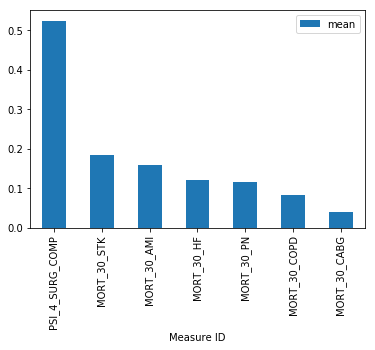

In [13]:
cd_dcomp['Ratio'].groupby(cd_dcomp['Measure ID']).describe().sort_values(['mean'],ascending=False)
cd_dcomp['Ratio'].groupby(cd['Measure ID']).describe().sort_values(['mean'],ascending=False).reset_index().plot.bar(x='Measure ID',y='mean')
#dcomp.plot.bar(x='Measure ID',y='mean')
#list(cd['Ratio'].groupby(cd['Measure ID']))

##### From the above sorted bar plot, we can see that the average ratio for deathly complications is the highest for 'Deaths among Patients with Serious Treatable Complications after Surgery' and least for 'Death rate for CABG'.

##### The below code gives us the measure name (description) of the highest and least ratio complication by using the Measure ID as key.

In [14]:
#cd[cd.'\Measure ID'=='PSI_4_SURG_COMP'].'\Measure Name'
#cd.get_value(index , col, takeable=False)
list(cd[(cd['Measure ID']=='PSI_4_SURG_COMP')]['Measure Name'].unique())

cd[(cd['Measure ID']=='MORT_30_CABG')]['Measure Name'].unique()

['Deaths among Patients with Serious Treatable Complications after Surgery']

array(['Death rate for CABG'], dtype=object)

# Identify the five safest hospitals

Return a **list** with the hospitals that have, on average, the lowest rate of deadly complications. **Be careful when you identify 'deathly' complications.** (Again, ignore that the dataset covers multiple years).

In [15]:
#len(cd[(cd.Ratio == 0.0)])
#cd.sort_values(['Ratio'], ascending=True).head(5)
#cd.groupby(cd['Provider ID','Measure ID'])
#print(cd[['Provider ID','Measure ID','Ratio']].groupby(['Provider ID','Measure ID']).mean())

cd_dcomp[['Provider ID','Hospital Name','Ratio']].groupby(['Provider ID','Hospital Name']).mean().sort_values(['Ratio'],ascending=True).head()

,,Ratio
Provider ID,Hospital Name,
210043,UNIVERITY OF MD BALTO WASHINGTON MEDICAL CENTER,0.0206
330101,NEW YORK-PRESBYTERIAN HOSPITAL,0.0220
180088,"NORTON HOSPITALS, INC",0.0226
40003F,SAN JUAN VA MEDICAL CENTER,0.0240
100007,FLORIDA HOSPITAL,0.0256


##### Now that we have the dataset that is filtered on complications that causes death/mortalility, we can use this for our analysis. Amongst the hospitals with varrying rates of deathly complications, the above is a list of 5 hospitals with the lowest rate of deadly complications. 

# Augment the datset with information about the state

Read the file `geo-data.csv` into an object `zip_codes`. **Make sure that you read all columns as string.** ([Link](https://github.com/scpike/us-state-county-zip))

In [16]:
zip_codes = pd.read_csv('geo-data.csv', dtype=str).rename(columns=lambda x: x.strip())

This file contains information about the relationship of zip codes, counties, and U.S. states. 

In [17]:
#zip_codes.columns
#zip_codes=zip_codes.rename(columns = {'zipcode':'ZIP code'})
#zip_codes.columns

| Column Name | Description|
|-------------|------------|
|state_fips | FIPS code for the state |
|state| Name of the state|
|state_abbr| Abbreviation of the state|
|zipcode | Postal code|
|county | County name|
|city | City name  |

1. Combine the dataset on complications with the dateset on zip codes.
2. Explain why you chose the column that used to combine the datasets.
3. **Do not worry, not all states will be matched.**

In [18]:
#merged_left = pd.merge(left=cd,right=zip_codes, how='left', left_on='ZIP code', right_on='zipcode')
#cdzip = cd.set_index('ZIP code')
#cd.columns
cdzip = cd.merge(zip_codes, how='left', left_on='ZIP Code', right_on='zipcode',left_index=True)
#cdzip
cdzip_dcomp = cd_dcomp.merge(zip_codes, how='left', left_on='ZIP Code', right_on='zipcode',left_index=True)


##### 1) Here I have left merged the geo-data dataset to the complications dataset on the zip code column, because the zipcode column values in the geo-data dataset match that of the complications file. And also zip code is the only column that is unambiguous. The column name of zip code is different in the two tables so they need to be explictity called out as left_on and right_on. I have used the left merge where the left table (cd_dcomp) is the main table and data is gathered from the right table(zip_codes) to add to the left.

##### 2) This cd_dcomp data set has the records of only the deathly complications with state value. And cdzip has the entire data set 'complications' merged with the states value. 

#####  Reference for merging : https://pandas.pydata.org/pandas-docs/stable/merging.html 

# Create an overview of the complications per U.S. state

* Return a sorted list with the overall complication rate per state. 
* Ignore that the data is for multiple years. 
* Focus on the **best** ten states.

#####  For computing the overall complication rate I debated between sum and mean. Given that the data available for all the states might not be for the same number of years, mean seemed to be the best way for a comparison. So I choose to group by state and take a mean of the the ratios of all the hospitals in that state. 

In [19]:
#cdzip[['state','Ratio']].groupby(['state']).mean().sort_values(['Ratio'],ascending=True).head(10)

#top10 = cdzip[['state','Ratio']].groupby(['state']).mean().sort_values(['Ratio'],ascending=True).head(10)

#top = cdzip[['state','Ratio']].groupby(['state']).mean().reset_index().sort_values(['Ratio'],ascending=True)
#top.drop(['Ratio'],axis=1)


top = cdzip[['state','Ratio']].groupby(['state']).mean().reset_index().sort_values(['Ratio'],ascending=True)
#top
top.head(10)

,state,Ratio
6,Delaware,0.0634
18,Maryland,0.0685
8,Florida,0.0756
7,District of columbia,0.0777
39,Virginia,0.0796
33,Pennsylvania,0.0869
27,New york,0.0881
34,South carolina,0.0893
28,North carolina,0.0899
30,Ohio,0.0918


#####  These 10 states represent the lowest rate of complications. This means that the complications caused by procedures in hostpitals of these states are the lowest in the US. 
#####  Below just gives a graphical representation.

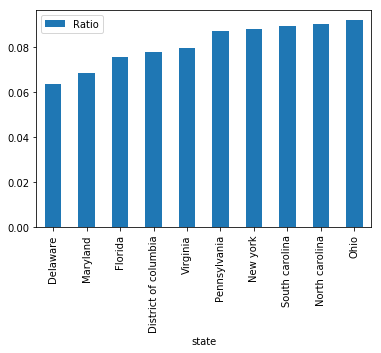

In [20]:
# Best 10 States
#top.drop(['Ratio'],axis=1).head(10)
top.head(10).plot.bar(x='state',y='Ratio')

# Create an overview of the change in complications across U.S. states

* Focus on the deadly complications only.
* Calculate the change as follows: **(average rate for last year in dataset - average rate for first year in dataset)/(average rate for first year in dataset)**

In [21]:
#cdzip[['state','Year']].groupby(['state','Year']).mean().sort_values(['Ratio'],ascending=True).head(10)
state_year = cdzip_dcomp[['state','Year','Ratio']].groupby(['state','Year']).mean().reset_index().sort_values(['Ratio'],ascending=False)
#state_year.columns
#state_year

In [22]:
#merge = top.merge(state_year, how='left', left_on='state', right_on='state',left_index=True)


In [23]:
#merge[merge.reset_index().groupby(['state'])['Year'].max()]
#merge[['state','Year','Ratio']].groupby(['state'])['Year'].max()
max = state_year.iloc[state_year.reset_index().groupby(['state'])['Year'].idxmax()]
min = state_year.iloc[state_year.reset_index().groupby(['state'])['Year'].idxmin()]
#min
#max

In [24]:
minmax = max.merge(min, how='left', left_on='state', right_on='state',left_index=True)
#minmax.columns
minmax['change']=(minmax['Ratio_x']-minmax['Ratio_y'])/minmax['Ratio_y']
#minmax

##### This piece was exceptionally challenging compared to the other questions. I first created a dataset from the deadly compositions dataset and grouped by state and year by taking mean of Ratio. I then created datasets max and min to have the first and last year data. I referred https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html for idxmax() function. 

##### I then merged min and max and calculated the change. 

Which state has improved the most?

##### Improvement is indicated by a higher ratio in previous years compared to the later years. So a negative number indicates that the later year has lesser ratio and has there fore improved over the years. 

In [25]:
minmax.sort_values('change',ascending=True).head(1)

,state,Year_x,Ratio_x,Year_y,Ratio_y,change
36,Delaware,2016,0.0457,2011,0.0563,-0.1874


Which state has the worst development?

##### Worst development is indicated by a greater positive value. This means that the deathly complications has increased in the later years

In [26]:
minmax.sort_values('change',ascending=False).head(1)

,state,Year_x,Ratio_x,Year_y,Ratio_y,change
258,Wyoming,2016,0.2335,2011,0.2111,0.1061


##### Wyoming seems like the state with the worst death rates for all the deathly complications. 

# Bonus

Which state has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'?

##### In the above analysis we had used all the seven measure types that indicated death and mortalitiy. For this analysis we would need to just pick records that have surg_comp. The method to follow is exactly same as above except that we start with a dataset that has only one kind of complication 

In [27]:
s_cd_dcomp = cd[cd['Measure ID'].str.contains("SURG_COMP")]
s_cdzip_dcomp = s_cd_dcomp.merge(zip_codes, how='left', left_on='ZIP Code', right_on='zipcode',left_index=True)
#s_cdzip

s_state_year = s_cdzip_dcomp[['state','Year','Ratio']].groupby(['state','Year']).mean().reset_index().sort_values(['Ratio'],ascending=False)
#s_state_year.columns

s_max = s_state_year.iloc[s_state_year.reset_index().groupby(['state'])['Year'].idxmax()]
s_min = s_state_year.iloc[s_state_year.reset_index().groupby(['state'])['Year'].idxmin()]
s_minmax = s_max.merge(s_min, how='left', left_on='state', right_on='state',left_index=True)
#s_minmax.columns

s_minmax['change']=(s_minmax['Ratio_x'] - s_minmax['Ratio_y']) / s_minmax['Ratio_y']
#s_minmax

s_minmax.sort_values('change',ascending=True).head(1)
s_minmax.sort_values('change',ascending=False).head(1)

,state,Year_x,Ratio_x,Year_y,Ratio_y,change
169,Wyoming,2015,0.4608,2012,0.6621,-0.3041


,state,Year_x,Ratio_x,Year_y,Ratio_y,change
149,Utah,2015,0.5339,2012,0.4393,0.2155


##### Utah is the state that has the worst development for 'Deaths among Patients with Serious Treatable Complications after Surgery'.

##### What is interesting to note is that Wyoming is the worst when we considered all the deathly complications, but when we look at only "Deaths among Patients with Serious treatable complications after surgery" Wyoming is the state that is the best in terms of development. On the whole there might have been more deaths due to complications in Wyoming but if only surgery was considered as the complicatoins, the deaths were the lowest. 

#  Conclusion 

##### The data gives a indication of the complications that occur in hospitals after procedures. Though some information about the hospitals can be gleaned from it, it is not enough to make hard conclusions. 

##### The number of years of the survey 2011 to 2016 is not extensive enough. There are also other factors that might need to be considered like age of patients, history of patient's health etc. 